# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from matplotlib.colors import LogNorm

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [4]:
X = iris_data.data
X.shape

(150, 4)

In [5]:
y = iris_data.target
y.shape

(150,)

In [6]:
set(y)

{0, 1, 2}

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [7]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


All features are of the same order of magnitude between 0 and 8 so No need for normalization

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [8]:
def calculate_distortion(X, cluster_centers, d_type = 'euclidean'):
    
    dist = sum(np.min(cdist(X, cluster_centers, d_type), axis=1)) 
    return dist / X.shape[0]

In [9]:
max_K = 10
distortions = []
silhouette_scores = []

Ks = range(2, max_K)

for k in Ks:
    kmeans_model = KMeans(k).fit(X)
    
    clusters = kmeans_model.labels_
    
    centroids = kmeans_model.cluster_centers_
    
    distortions.append(calculate_distortion(X, centroids))
    
    silhouette_scores.append(silhouette_score(X, clusters))
    
#     plt.scatter(X[:,0],X[:,1], c = clusters)
#     plt.title(f'K = {k}')
#     plt.show()
    

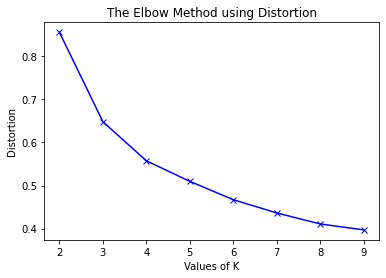

In [10]:
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


From the elbow method graph and by visualizing the clusters I would go with **K = 3 or 4**

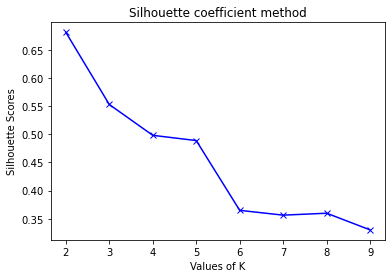

In [11]:
plt.plot(Ks, silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette coefficient method')
plt.show()


The above graph shows that **K = 2** got the best score, 
but this is not as expected (we know from the labels that we have 3 clusters)

In [12]:
Kmeans_best_silhouette = max(silhouette_scores)
Kmeans_best_silhouette

0.6810461692117462

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

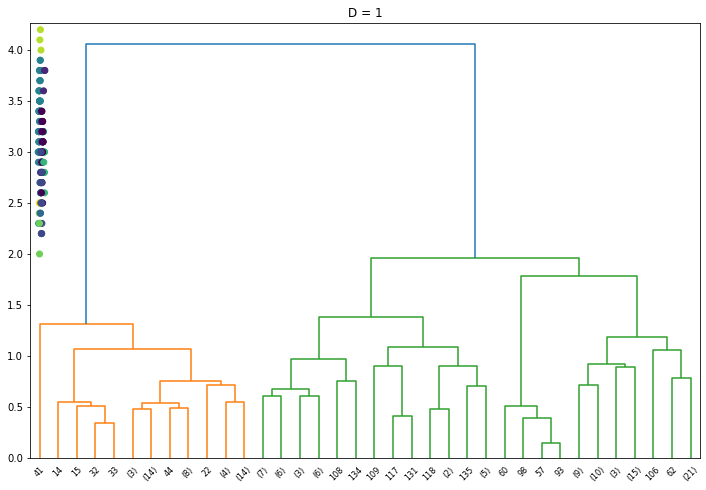

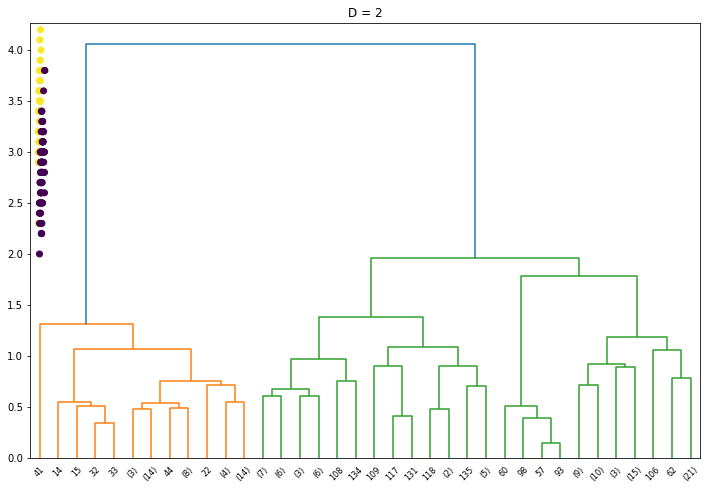

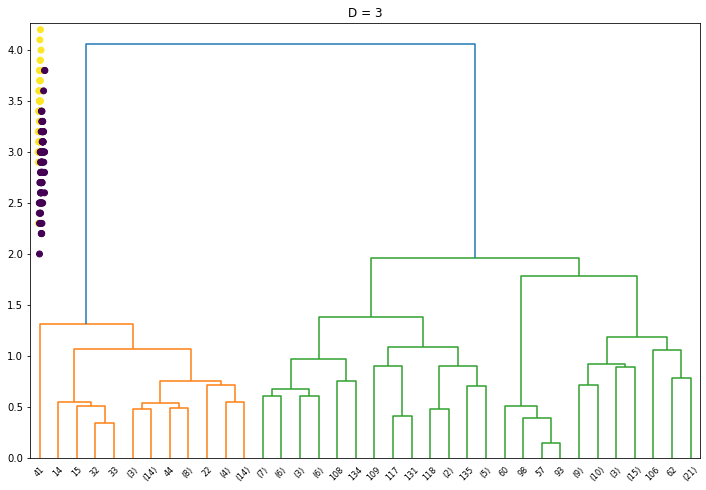

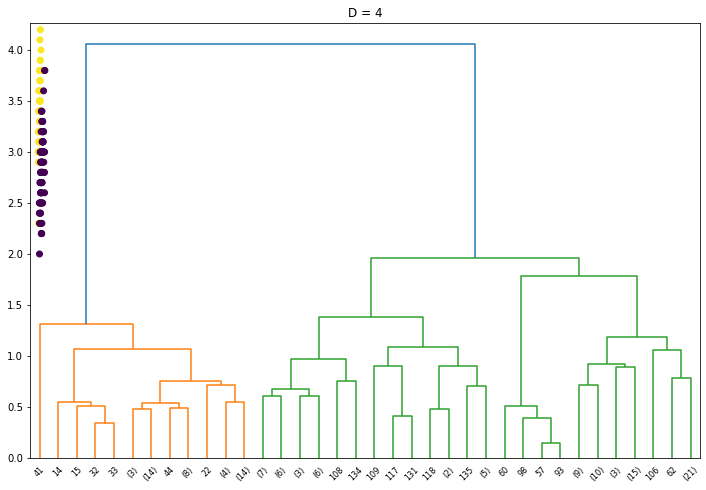

In [13]:
max_K = 10
distortions = []
silhouette_scores = []

Ds = range(1, max_K,1)

for d in Ds:
    hierar_model = AgglomerativeClustering(n_clusters= None, distance_threshold = d, linkage="average")
    hierar_model.fit(X)

    clusters = hierar_model.labels_
    if len(set(clusters)) == 1:
        break
    n_samples = len(clusters)
    counts = np.zeros(hierar_model.children_.shape[0])
    
    for i, merge in enumerate(hierar_model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([hierar_model.children_, hierar_model.distances_,
                                      counts]).astype(float)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, truncate_mode="level", p=5, ax = ax)
    
    silhouette_scores.append(silhouette_score(X, clusters))
    
    plt.scatter(X[:,0],X[:,1], c = clusters)
    plt.title(f'D = {d}')
    plt.show()
    

Numbers on the X-axis represent the number of points belonging to that cluster, if no parenthese then it is the index of the point

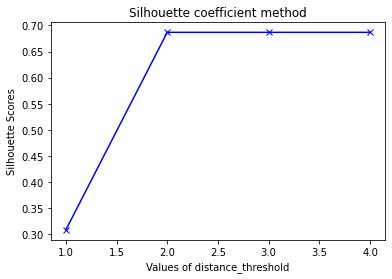

In [14]:
plt.plot(Ds[:len(silhouette_scores)], silhouette_scores, 'bx-')
plt.xlabel('Values of distance_threshold')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette coefficient method')
plt.show()


In [15]:
hier_best_silhouette = max(silhouette_scores)
hier_params = Ds[np.argmax(silhouette_scores)]
print(hier_params)
hier_best_silhouette

2


0.6867350732769777

Setting the distance threshold to 2 gave the highest silhouette score

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [16]:
silhouette_scores = []
eps = np.arange(0.1,3,0.5)
min_samples_range = range(5,26)

for e in eps:
    for min_samples in min_samples_range:
        db = DBSCAN(eps=e, min_samples=min_samples).fit(X)
        clusters = db.labels_
        if len(set(clusters)) == 1:
            continue
        silhouette_scores.append([e,min_samples, silhouette_score(X, clusters)])
#         plt.scatter(X[:,0],X[:,1], c = clusters)
#         plt.title(f'eps = {e}, min_samples = {min_samples}')
#         plt.show()
    


In [17]:
print(len(eps), len(min_samples_range))

6 21


In [18]:
silhouette_scores = np.array(silhouette_scores)
#silhouette_scores

In [19]:
#silhouette_scores[:,2]

In [20]:
db_best_silhouette = max(silhouette_scores,key = lambda x:x[2])
i = np.where(silhouette_scores[:,2] == db_best_silhouette[2])[0][0]

db_params = {"eps" :silhouette_scores[i,0] ,
             "min_samples": silhouette_scores[i,1]}

print(db_params)

db_best_silhouette[2]

{'eps': 1.1, 'min_samples': 5.0}


0.6867350732769777

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [21]:
cov_types = ['full', 'tied', 'diag', 'spherical']
silhouette_scores = []

for n in range(2,8):
    for t in cov_types:
        gaussian_mix = GaussianMixture(n_components = n, covariance_type=t).fit(X)
        pred = gaussian_mix.predict(X)
        silhouette_scores.append([n,silhouette_score(X, pred)])
    

<Figure size 432x288 with 0 Axes>

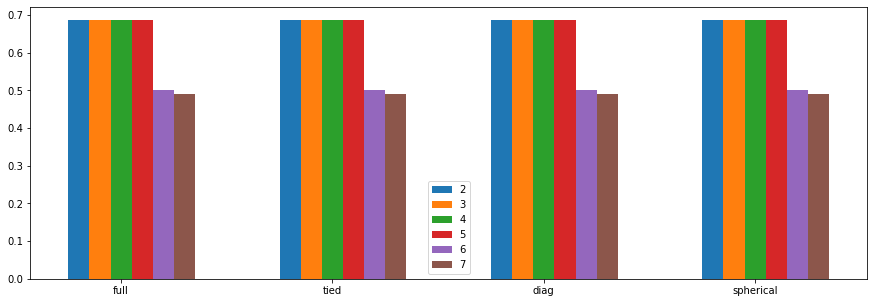

<Figure size 432x288 with 0 Axes>

In [22]:
x_axis = np.arange(4)


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
bar_width = 0
for i, n in enumerate(range(2,8)):
    bar_width += 0.1
    ax.bar(x_axis+bar_width, silhouette_scores[i][1], width=0.1, label = str(n))
    
ax.set_xticks(x_axis+bar_width/2)
ax.set_xticklabels(cov_types)
ax.legend()

plt.figure()

We are searching for the highest silhouette score, since n = 2, 3, 4, 5 showed same score, so I will pick the lowest n <br>
which is n = **2** same as other models